<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/Travel_Aggregator_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Travel Aggregator Analysis
 "Travelling has significantly changed thanks to technology. In the earlier days, it was not
easy to travel as booking journeys used to be a hassle, where people needed to contact
travel agents, get prices and then do a lot of paperwork.
But, with the advent of online apps, it becomes easier to book tickets. However, one
challenge is still there. Due to many available apps which offer bookings, there can be a lot
of comparisons for getting the best price.
A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top
platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming
journeys on its platform and the customer is redirected to the desired platform after
looking at the price.
However, they need to do a lot of analysis of the data which they have collected over a
while.
As a newly hired analyst and proficiency in Python, your role is to help them perform an indepth analysis."

Q.1 Find the number of distinct bookings, sessions, and searches from the given data sets

In [ ]:
#To find the number of distinct bookings, sessions, and searches using Python with pandas, you'll need to read both CSV files and use the nunique() method.
import pandas as pd

# Load CSVs
df_bookings = pd.read_csv('Bookings.csv')
#print(df_bookings.head())
df_sessions = pd.read_csv('Sessions.csv')
#df_sessions.head()

#number fo distinct bookings
# printing the unique values present in the booking column
print("Printing the unique values present in the booking column",df_bookings['booking_id'].nunique())


#number fo distinct sessions
# printing the unique values present in the session column
print("Printing the unique values present in the sessions column",df_sessions['session_id'].nunique())

#number fo distinct searches
# printing the unique values present in the search column
print("Printing the unique values present in the search column",df_sessions['search_id'].nunique())


Printing the unique values present in the booking column 339
Printing the unique values present in the sessions column 331
Printing the unique values present in the search column 1360


Q.2 How many sessions have more than one booking?


In [ ]:
#How many sessions have more than one booking?
# Drop null bookings (if some sessions didn’t lead to bookings)
filtered_df = df_sessions.dropna(subset=['booking_id'])

# Count unique bookings per session
booking_counts = filtered_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = booking_counts[booking_counts > 1]

# Output count
print(f"Number of sessions with more than one booking: {len(sessions_with_multiple_bookings)}")


session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 329, dtype: int64
Number of sessions with more than one booking: 10


Q.3 Which days of the week have the highest number of bookings? Also, draw a pie
chart to show the distribution for all days of the week?


Day with the highest number of bookings: Thursday
booking_day
Friday       51
Monday       51
Saturday     44
Sunday       35
Thursday     65
Tuesday      59
Wednesday    34
Name: count, dtype: int64


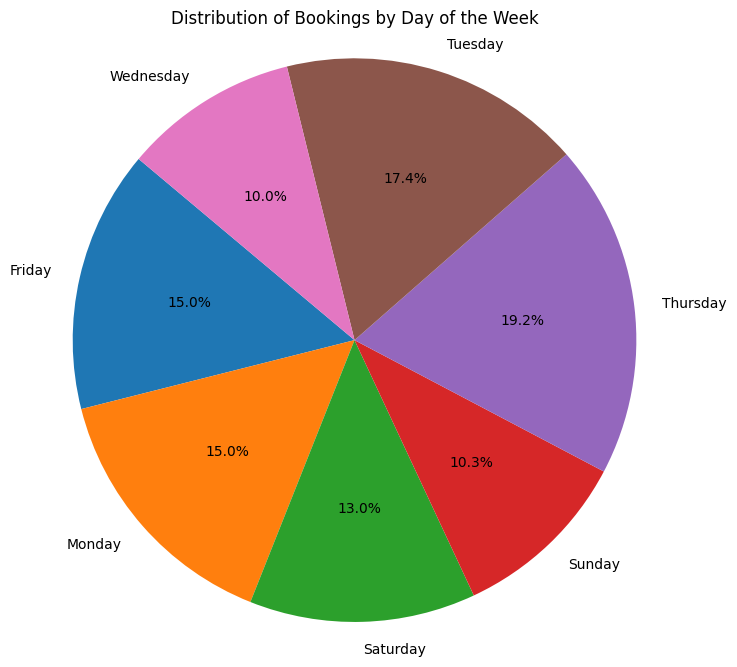

In [ ]:
#Which days of the week have the highest number of bookings?
# Also, draw a pie chart to show the distribution for all days of the week?
import pandas as pd
import matplotlib.pyplot as plt

# Load bookings dataset
booking_df = pd.read_csv("Bookings.csv")

# Convert 'booking_time' to datetime
booking_df['booking_time'] = pd.to_datetime(booking_df['booking_time'])

# Extract day of the week (e.g., Monday, Tuesday)
booking_df['booking_day'] = booking_df['booking_time'].dt.day_name()

# Count bookings per day
day_counts = booking_df['booking_day'].value_counts().sort_index()  # sort for consistent pie chart order

# Display the most frequent booking day(s)
most_bookings_day = day_counts.idxmax()
print(f"Day with the highest number of bookings: {most_bookings_day}")
print(day_counts)

#plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


Q.4  For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [ ]:
# Step 2: Group the data by service name
grouped_data = df_bookings.groupby('service_name')

# Step 3: Get total number of bookings for each service
total_bookings = grouped_data['booking_id'].count()

# Step 4: Get total Gross Booking Value (INR) for each service
total_gbv = grouped_data['INR_Amount'].sum()

# Step 5: Combine both results into a summary DataFrame
summary = pd.DataFrame({
    'Total Bookings': total_bookings,
    'Total Gross Booking Value (INR)': total_gbv
})

# Step 6: Display the result
print(summary)

              Total Bookings  Total Gross Booking Value (INR)
service_name                                                 
GOIBIBO                  186                       5897637.97
MMT                       48                        665669.08
YATRA                    105                       3378702.13


Q. 5 For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?

In [4]:
#For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df_bookings = pd.read_csv('Bookings.csv')

'''customerbookings = df_bookings.groupby('customer_id').filter(lambda x: len(x) > 1)
route_counts = customerbookings.groupby(['from_city', 'to_city']).size().reset_index(name='count')
most_booked_route = route_counts.loc[route_counts['count'].idxmax()]
print(f"The most booked route is from {most_booked_route['from_city']} to {most_booked_route['to_city']} with {most_booked_route['count']} bookings.")
'''
# Step 2: Group by customer_id and count booking_ids
customer_booking_counts = df_bookings.groupby('customer_id')['booking_id'].count()

# Step 3: Filter customers who have more than 1 booking
multi_booking_customers = customer_booking_counts[customer_booking_counts > 1].index

# Step 4: Filter the main data to include only these customers
multi_booking_data = df_bookings[df_bookings['customer_id'].isin(multi_booking_customers)]

# Step 5: Create a new 'route' column
multi_booking_data = multi_booking_data.copy()  # avoid SettingWithCopyWarning
multi_booking_data['route'] = multi_booking_data['from_city'] + " ➔ " + multi_booking_data['to_city']

# Step 6: Group by 'route' and count how many times each route was booked
route_counts = multi_booking_data.groupby('route')['booking_id'].count()

# Step 7: Find the route with the maximum bookings
most_common_route = route_counts.idxmax()
most_common_route_count = route_counts.max()

# Step 8: Display the result
print(f"The most booked route among customers with multiple bookings is: {most_common_route}")
print(f"Number of times this route was booked: {most_common_route_count}")

The most booked route among customers with multiple bookings is: Gurgaon ➔ Roissy-en-France
Number of times this route was booked: 5


Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?

In [30]:
import pandas as pd

# Step 1: Load the data
data = pd.read_csv("Bookings.csv")  # Replace with your filename

# Step 2: Group by 'from_city'
city_group = data.groupby('from_city')

# Step 3: For each city, calculate:
# - total departures (count of bookings)
# - average days to departure
city_stats = city_group.agg(
    total_departures=('booking_id', 'count'),
    avg_days_to_departure=('days_to_departure', 'mean')
).reset_index()

# Step 4: Filter only cities with at least 5 departures
city_stats_filtered = city_stats[city_stats['total_departures'] >= 5]

# Step 5: Sort by highest average days to departure
top_cities = city_stats_filtered.sort_values(by='avg_days_to_departure', ascending=False)

# Step 6: Display the top 3 cities
print("Top 3 departure cities where customers book mostly in advance:")
print(top_cities)

Top 3 departure cities where customers book mostly in advance:
      from_city  total_departures  avg_days_to_departure
7       Bālāpur                 6              46.166667
11   Devanhalli                24              29.583333
8       Chennai                16              26.187500
16      Gurgaon               136              26.176471
27       Mumbai                34              21.764706
29    New Delhi                 7              21.285714
25  Madhyamgram                 6              15.000000
10        Delhi                29              12.758621
1     Ahmedabad                 8              11.750000
33   Rāja Sānsi                17               8.823529


In [28]:
#Which are the top 3 departure cities from where customers book mostly in advance,provided that there have been at least 5 departures from that city?
df_departurecity = df_bookings.groupby('from_city')['booking_id'].count().reset_index()
df_departurecity.columns = ['from_city', 'count']

df_departurecity = df_departurecity[df_departurecity['count'] >= 5].sort_values(by='count', ascending=False)
#df_departurecity = df_departurecity.sort_values(by='count', ascending=False)
print(df_departurecity)

# Step 4: Filter the main data to include only these cities
multi_booking_data = df_bookings[df_bookings['from_city'].isin(df_departurecity['from_city'])]
#print(multi_booking_data)

#Now filter data for advance bookings where days of departure is greater then 0
df_advance = multi_booking_data[multi_booking_data['days_to_departure'] > 0]
print(df_advance.head())

#top 3 departure cities from where customers book mostly in advance
df_advance_departurecity  = df_advance.groupby('from_city')['booking_id'].count().reset_index()
print(df_advance_departurecity)
df_advance_departurecity = df_advance_departurecity.sort_values(by='booking_id', ascending=False)
print(df_advance_departurecity.head(3))


      from_city  count
16      Gurgaon    136
27       Mumbai     34
10        Delhi     29
11   Devanhalli     24
33   Rāja Sānsi     17
8       Chennai     16
1     Ahmedabad      8
29    New Delhi      7
7       Bālāpur      6
25  Madhyamgram      6
    customer_id   booking_id   from_city from_country            to_city  \
0  customer_259   booking_82     Gurgaon        India          Ahmedabad   
1  customer_303  booking_156       Delhi        India           Brussels   
2  customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3  customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4  customer_287  booking_222     Gurgaon        India   Roissy-en-France   

  to_country          booking_time device_type_used  INR_Amount service_name  \
0      India  2020-02-05T16:12:08Z          Desktop     2565.28          MMT   
1    Belgium  2018-11-21T08:21:47Z          Android    23120.00        YATRA   
2    Germany  2019-12-16T22:54:58Z          Androi